This notebook is intended as an introduction to some of the basic functionality of Jupyter Notebooks used throughout this set of tutorials. First, we demonstrate how to import external packages, read the raw study data and configure the plotting interface.

We also demonstrate how to perform Probabilistic Quotient Normalisation, apply different types of scaling to the data matrix and visualise their impact on the raw data matrix and interpretation.

<br>

*Credits: This tutorial was originally created by Gonçalo Correia and was adapted by Humma Hussain and Frederico Soares in November 2023.*

# Importing data, scaling and normalisation

### Package/code import and environment set up

In [ ]:
!pip install -q ipympl

In [ ]:
!git clone https://github.com/IPTC-DataAnalysisCourse/chemometrics-tutorials.git
%cd chemometrics-tutorials

The following cell imports the various necessary python packages. This cell is run at the beginning of each notebook.

In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pds

The PCA and PLS/PLS-DA/OrthogonalPLS codes provided in these tutorial notebooks are bundled as a python module (package) named **pyChemometrics**. As an example, the next cell imports the *pyChemometrics* scaler and PCA objects. The syntax and functions of these objects will be explained throughout the tutorials.

In [3]:
# Example import
from pyChemometrics.ChemometricsPCA import ChemometricsPCA
from pyChemometrics.ChemometricsScaler import ChemometricsScaler

# Other available objects
# 1) ChemometricsPLS
# 2) ChemometricsOrthogonalPLS
# 3) ChemometricsPLSDA
# 4) ChemometricsOrthogonalPLSDA

The next cell sets up the figure display mode. The *notebook* and *ipympl* modes allows interactive plotting. Another option is to select *inline*, to obtain static plots in a notebook cell.

In [4]:
# Set the plot backend to support interactive plotting - run this when running in jupyter notebook
%matplotlib notebook

In [ ]:
# Set the plot backend to support interactive plotting - run this when running in Google Colab
%matplotlib ipympl

import plotly.io as pio
pio.renderers.default = "colab"

from google.colab import output
output.enable_custom_widget_manager()

## Import data and plot

We will now import the NMR data and the metadata (Y variables).

X - NMR data matrix

Y - Matrix with the 2 metadata outcomes

ppm - Chemical shift axis for the NMR data in H $\delta$ppm.

#### Metadata
Y1 - represents the sex (1: Male, 0: Female, in original Y data matrix)

Y2 - represents the age (varies from 61 - 94, in original Y data matrix)

In [5]:
# Load the dataset
dementia_nmr_dataset = pds.read_csv("./Data/Dementia U NMR_Data.csv",delimiter=',')


# Inspect the dataset
dementia_nmr_dataset.head(10)

,Sample File Name,Sample ID,SampleType,Age,Gender,10.0,9.999449972498624,9.99889994499725,9.998349917495874,9.9977998899945,...,-0.995049752487624,-0.995599779989,-0.996149807490374,-0.99669983499175,-0.997249862493124,-0.9977998899945,-0.998349917495876,-0.99889994499725,-0.999449972498626,-1.0
0,ALZ_Urine_Rack03_RCM_06012015/630,DCR00472_U,Study Sample,82.0,Male,1046.878564,1964.835456,1214.827535,979.178442,716.112203,...,542.347771,1826.017509,1136.716059,153.845091,17.618434,-99.344394,366.767728,-286.726700,260.866660,51.109180
1,ALZ_Urine_Rack03_RCM_06012015/660,TLSC0701_U,Study Sample,69.0,Male,1798.290099,1403.845937,837.502854,751.677244,110.666493,...,1334.413664,2555.408279,2183.242580,1856.056053,1445.823344,1378.368769,959.386765,196.760727,889.517722,-1153.913004
2,ALZ_Urine_Rack03_RCM_06012015/360,DCR00369_U,Study Sample,83.0,Male,-586.624548,-133.726768,945.068865,1641.999614,582.201707,...,953.895767,657.163898,1585.798933,1568.568238,675.431759,-537.434744,393.147442,250.800203,17.798867,183.340716
3,ALZ_Urine_Rack03_RCM_06012015/390,LND.0028_U,Study Sample,73.0,Male,1928.989260,673.853156,15.740113,436.368400,166.719762,...,-580.840357,361.008710,295.215623,1689.115389,2227.451407,1452.648463,1309.538355,1260.619590,1852.473282,1083.373438
4,ALZ_Urine_Rack03_RCM_06012015/80,LND.0157_U,Study Sample,72.0,Male,-188.364675,-101.500931,-114.613030,1109.915169,1313.188953,...,4.215883,200.767094,-441.657184,-771.094044,-129.755972,1029.354606,1535.921671,1122.522146,1366.155336,604.720189
5,ALZ_Urine_Rack03_RCM_06012015/340,KPOM0006_U,Study Sample,75.0,Male,148.128309,-376.978448,-658.776995,612.246277,537.021593,...,1470.762291,831.427077,1139.655218,1529.427128,669.168054,1184.052641,1008.831633,666.688547,577.037214,492.963365
6,ALZ_Urine_Rack03_RCM_06012015/820,TLSA0507_U,Study Sample,64.0,Female,-200.139632,86.611561,621.509596,1682.824656,1158.696492,...,1242.309640,1009.948655,-321.938491,437.318438,-71.159843,156.396539,437.437821,614.565830,-82.728626,594.335530
7,ALZ_Urine_Rack03_RCM_06012015/800,KPOA0033_U,Study Sample,82.0,Female,851.439383,450.442989,634.342069,713.555904,-1073.912768,...,1833.317012,922.797302,-122.768620,-343.388334,-879.330887,902.175190,952.221712,974.517889,1325.935655,1112.727669
8,ALZ_Urine_Rack03_RCM_06012015/500,TLSC0711_U,Study Sample,79.0,Male,683.616498,105.199457,1108.012423,1289.059679,623.457555,...,-407.140281,183.813017,1110.420789,983.248385,1439.534689,139.246433,-78.488303,901.888981,302.968247,357.978002
9,ALZ_Urine_Rack03_RCM_06012015/580,TLSC0712_U,Study Sample,70.0,Male,114.934697,768.260520,1394.300593,1331.501754,1163.470523,...,1019.687211,1611.635895,1262.676755,400.459021,616.172360,1061.808723,202.800350,339.314935,791.155271,116.445932


In [6]:
# Delete samples where outcome variable is unknown - Study Samples in standard NPC pipeline
#dementia_nmr_dataset = dementia_nmr_dataset[~dementia_nmr_dataset['Gender'].isnull()]

# Create the X matrix
X = dementia_nmr_dataset.iloc[:, 5::].values

# Use pandas Categorical type to generate the dummy enconding of the Y1 vector (0 and 1) 
Y1 = pds.Categorical(dementia_nmr_dataset['Gender']).codes

#Use any regular numpy array for continuous variables
Y2 = np.array(dementia_nmr_dataset['Age'], dtype='int')

ppm = np.array(dementia_nmr_dataset.columns[5::], dtype=np.float64)

**Note**: To apply the analyses exemplified in this notebook to any other dataset, just modify the cell above to import the data matrices and vectors X and Y from any other source file.

The expected data types and formatting for **X** and **Y** are:

   **X**: Any data matrix with n rows (observations/samples) and p columns (variables/features). The matrix should be provided as a [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object, with 2 dimensions, and with shape = (n, p). We recommend using the *numpy* function [numpy.genfromtxt](https://numpy.org/devdocs/reference/generated/numpy.genfromtxt.html) or the *pandas* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to read the data from a text file. When using the *pandas.read_csv* function, extract the data matrix as a *numpy.ndarray* from the pandas.DataFrame object using the `.values` attribute.
```
X_DataFrame = pds.read_csv("./data/X_spectra.csv")
X = X_DataFrame.values
```
   
   **Y** vectors: Each **Y** vector should be a 1-dimensional [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object, with a number and ordering of elements matching the rows in **X**. For continuous variables, any regular *numpy.ndarray* with a data type of `int` (integers only) or `float` can be used.
   ```
   Y_continuous = numpy.ndarray([23.4, 24, 0.3, -1.23], dtype='float')
   ```
To encode binary class labels, a *numpy.ndarray* of dtype `int`, with 0 and 1 as labels (e.g., 0 = Control, 1 = Case) must be used. The way in which classes are encoded will affect the model interpretation: the class labeled as 1 is used as the "positive/case" class by the *pyChemometrics* objects.
   
   In the example above, we used the *pandas* [Categorical](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) datatype to handle the conversion of the original categorical variable (Male, Female) to the required (0, 1) labels. After converting a column to a `Categorical` datatype, the `.codes` attribute returns a vector with the same length of the original Y, but where each value is replaced by their integer (`int`) code. The correspondence between code and category can be inspected with the `categories` attribute. The order of the labels in `.codes` is the same as the order of the `categories` attribute (i.e. 0 is the first element in `categories`, 1 the second and so on).
   ```
   Y1 = pds.Categorical(Y.iloc[:, 1])
   Y1.codes # The numerical label
   Y1.categories # Original text or numerical description of the category
   ```
   [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) is another helpful function to perform dummy (0-1) encoding of variables.

### Plot the raw data

The plot in the next cell displays the raw NMR data. The X axis corresponds to the chemical shift in $\delta_H$ ppm (part-per-million). The TSP chemical shift reference and the water peak region ($\delta_H$ 5-4.6 ppm) have been previously removed, as these regions are not biologically informative. Since this is an NMR spectroscopy dataset we follow the convention of presenting the $\delta$ppm scale with 0 on the right of the axis.

<IPython.core.display.Javascript object>


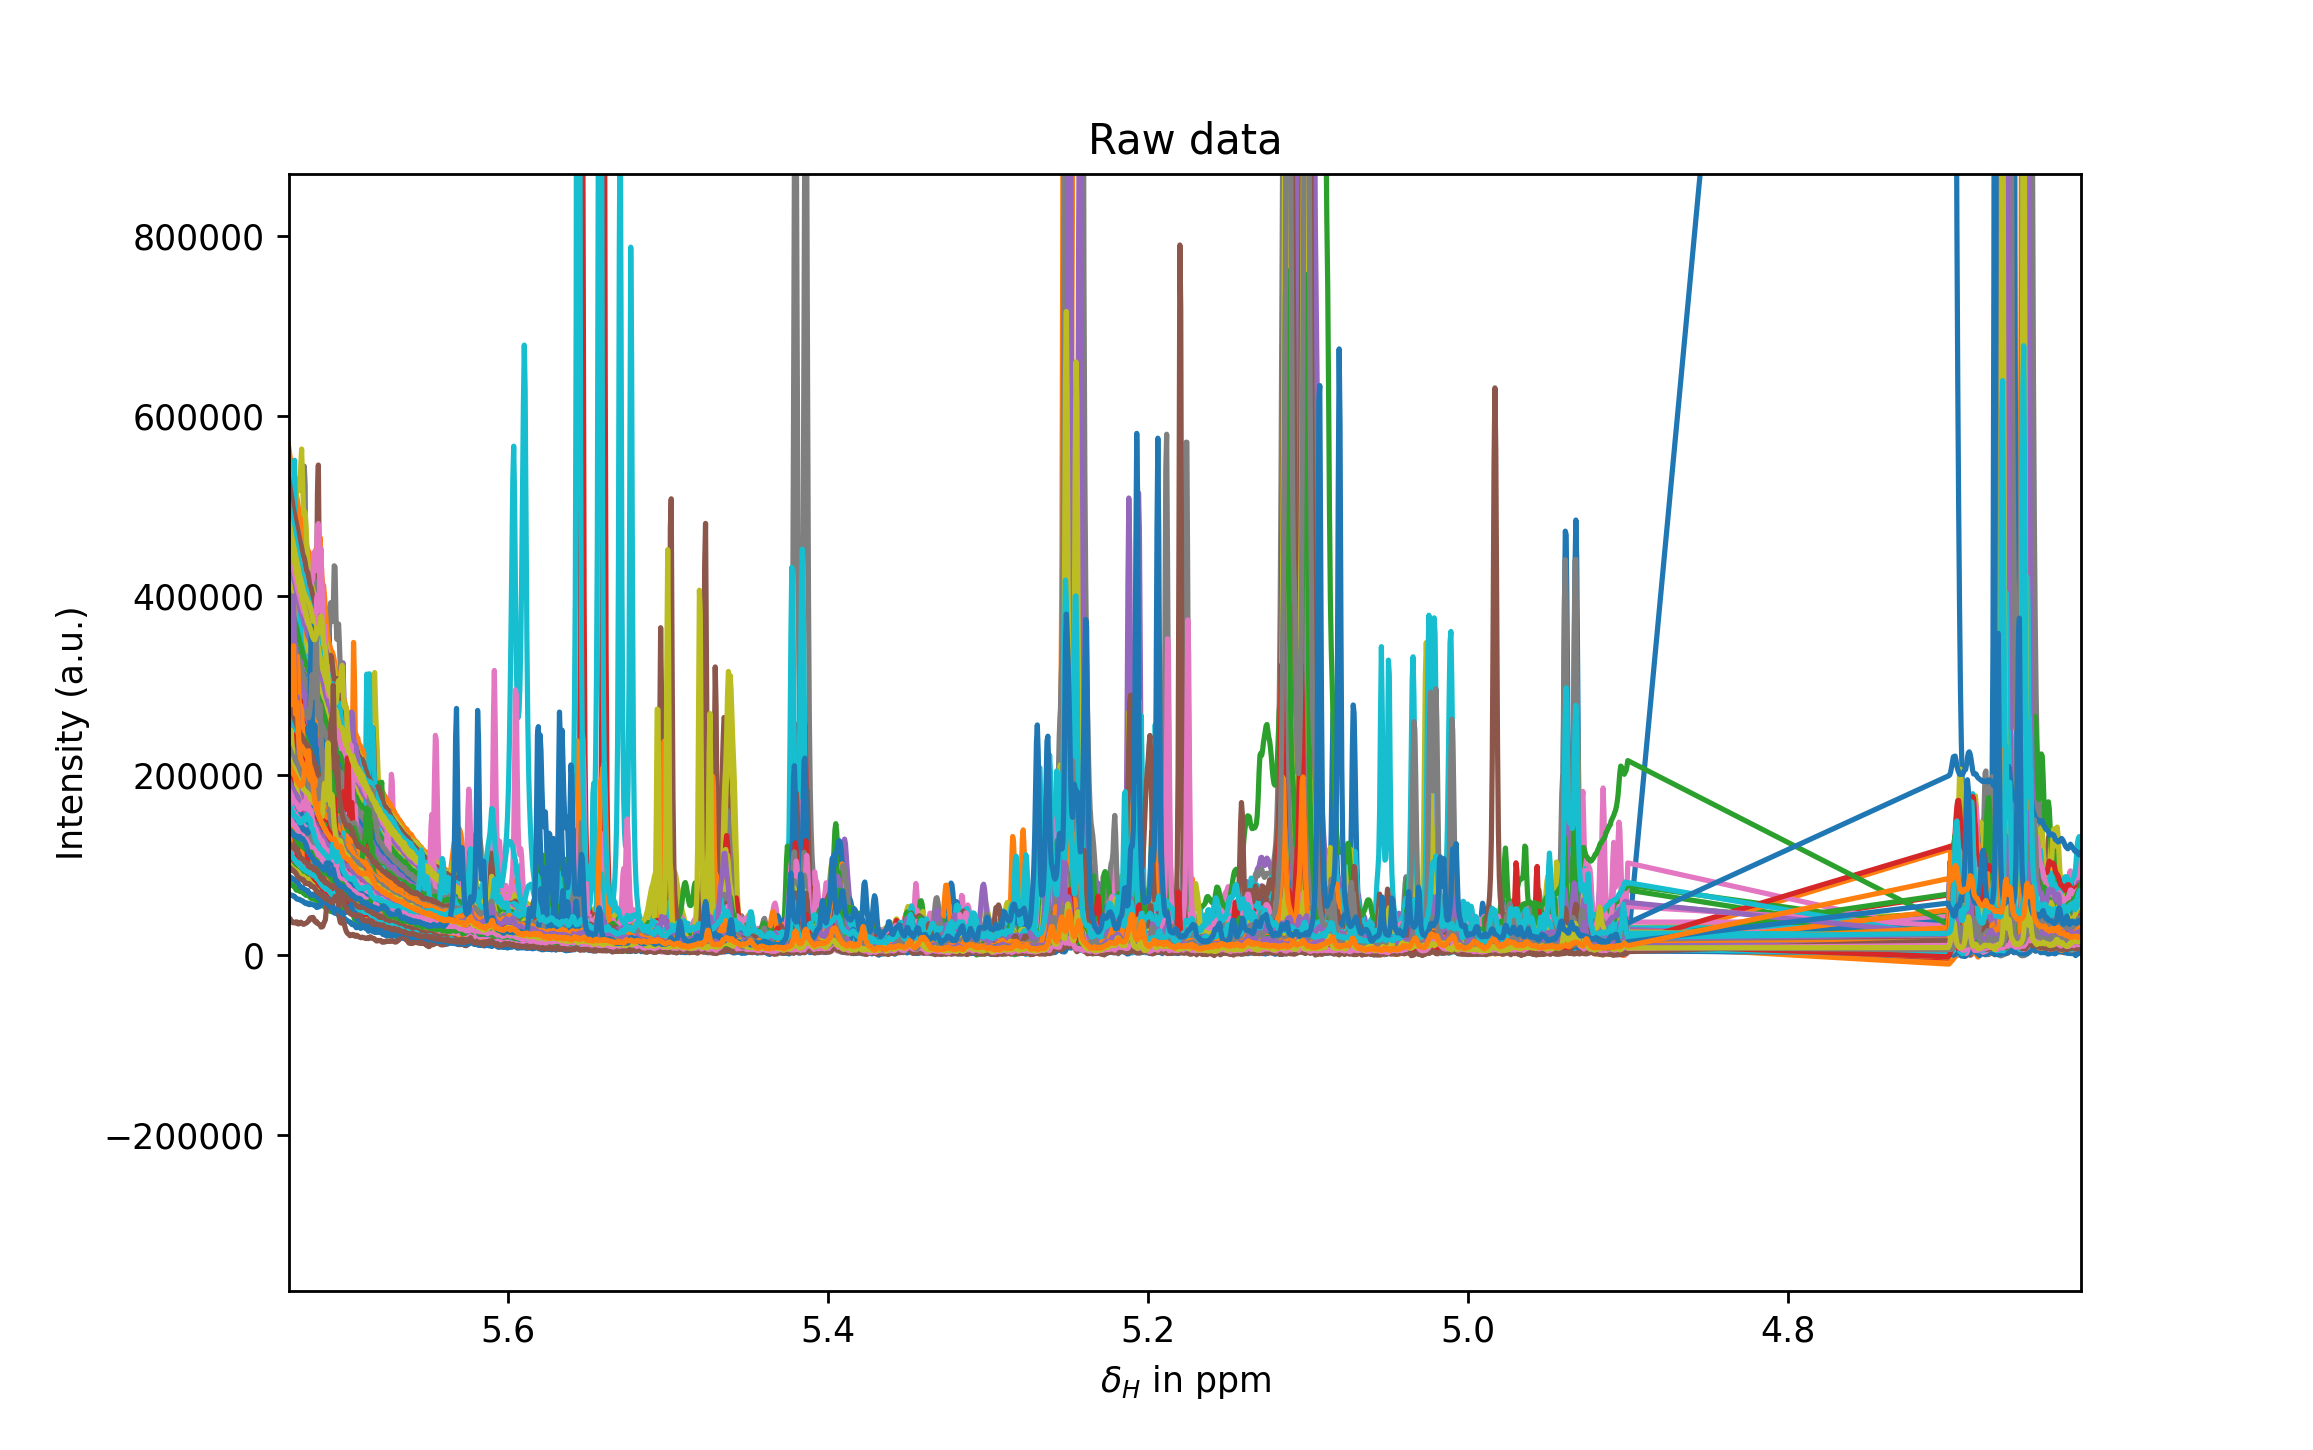

In [7]:
plt.figure()
plt.plot(ppm, X.T)
plt.title("Raw data")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
plt.show()

# Normalisation

The main purpose of normalisation is to account for systematic experimental differences in the overall intensity of observations (rows of the data matrix) that can confound the analysis. For example, different amount of material per sample, urinary dilution or an instrumental intensity drift caused by a batch or run-order effect.

One of the first decisions in the statistical analysis of metabolic profile data is whether or not to apply
normalisation, and which method to use. Mathematically, normalisation procedures estimate and apply an individual scaling factor to each observation in the data matrix (row-wise scaling of the data matrix).

Here we will demonstrate and use the Probabilistic Quotient Normalisation ([Dieterle et al. 2006](https://www.ncbi.nlm.nih.gov/pubmed/16808434)) method.

The PQN algorithm requires the selection of reference spectrum. A robust default choice is to select the median or mean spectrum as normalisation reference.


<IPython.core.display.Javascript object>


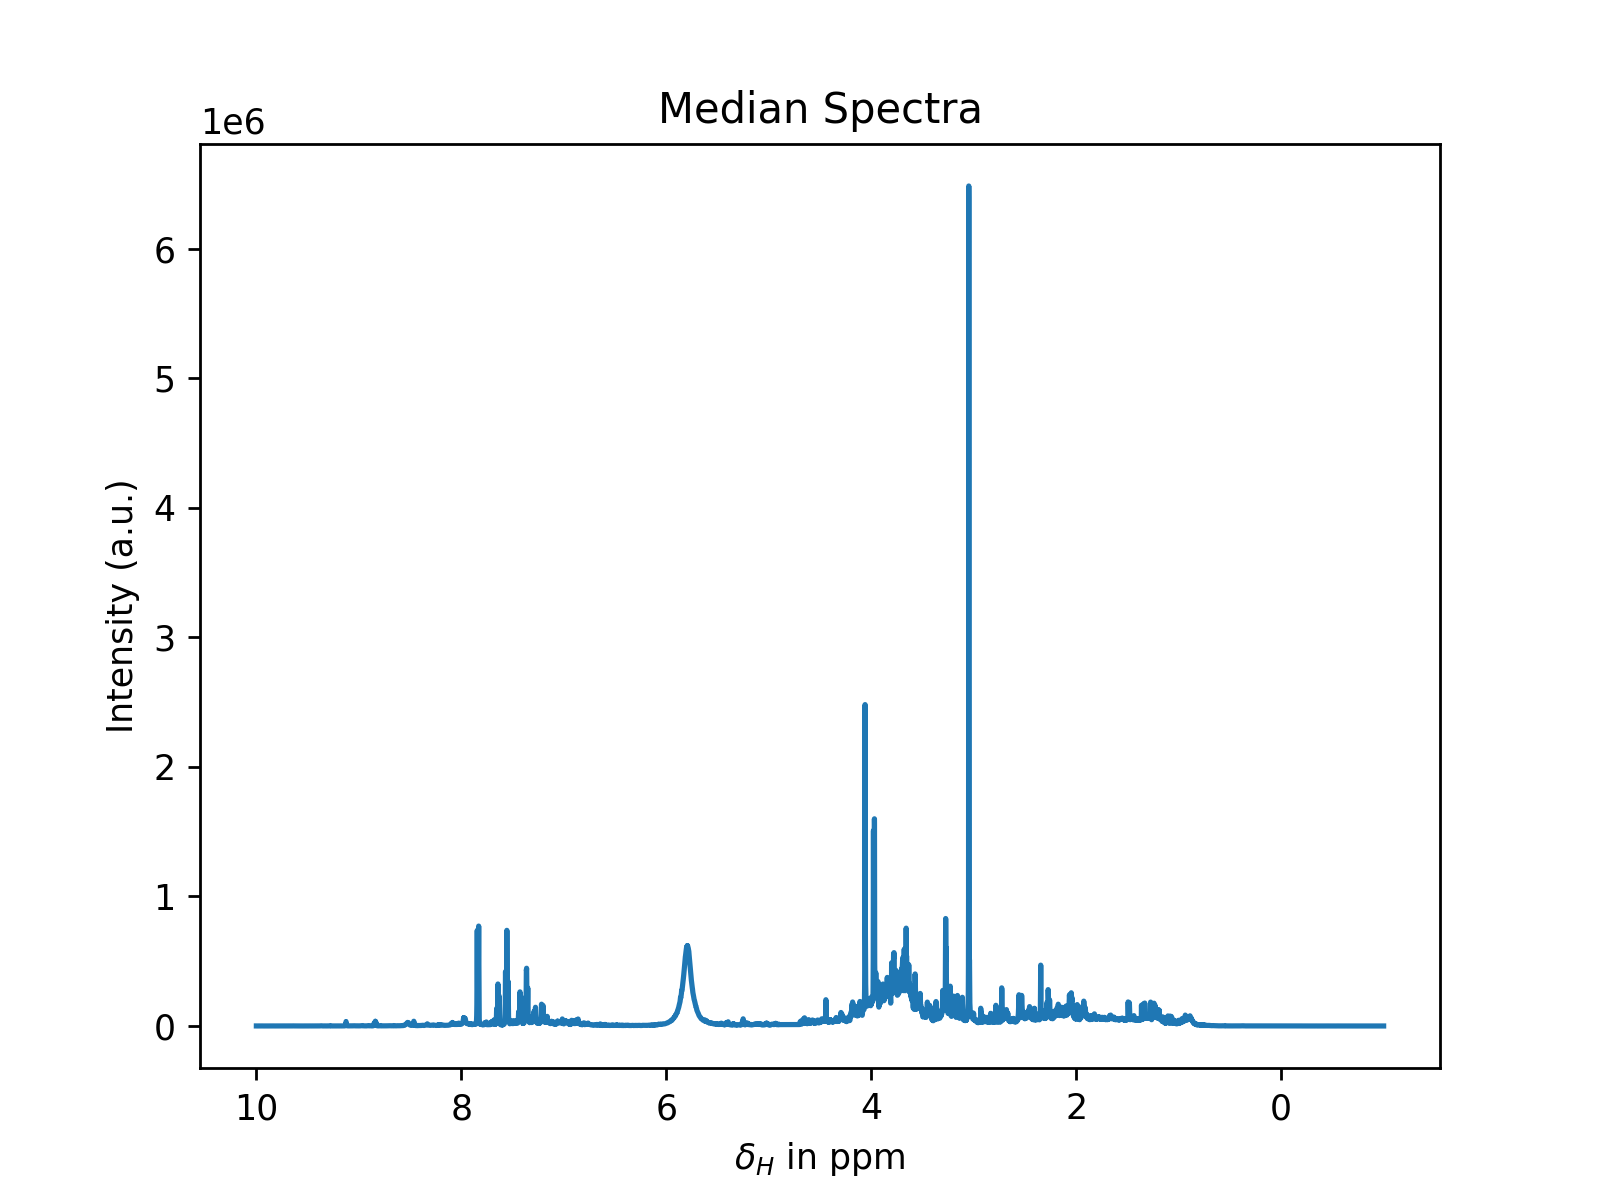

In [8]:
# Get reference median spectra
median_spectra = np.median(X, axis=0)

plt.figure()
plt.title("Median Spectra")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.plot(ppm, median_spectra)
plt.gca().invert_xaxis()
plt.show()

After selecting a reference, each data point (variable) in each observation (row) is divided by the corresponding value of the same variable in the reference, to obtain a matrix of ratios to reference (*foldChangeMatrix*). The PQN coefficients (*pqn_coef*) corresponding to each observation are then estimated by taking the median across all variables row-wise. These coefficients are then used to normalised the data.

In [9]:
# Calculate the ratio to the reference per variable for all spectrum, to obtain a matrix of "fold changes"
foldChangeMatrix = X / median_spectra[None, :]

# Estimate the median fold change per row (spectrum), which is the PQN normalisation coefficient.
# We use the nanmedian function to automatically ignore NA's when estimating this factor
pqn_coef = np.nanmedian(foldChangeMatrix, axis=1)

# Normalise the spectra using the median ratio
norm_X = X / pqn_coef[:, None]


We can now plot the PQN coefficients, to assess the range of overall intensity/dilution/concentration ranges in the dataset which will be corrected by the normalisation procedure.

In the next histogram, these have been re-expressed as a scaling factor, $\frac{1}{PQN coefficient}$, for ease of interpretation: values smaller than one represent samples with an overall intensity higher than the median which will be downscaled, and the opposite for samples with value above 1.

<IPython.core.display.Javascript object>


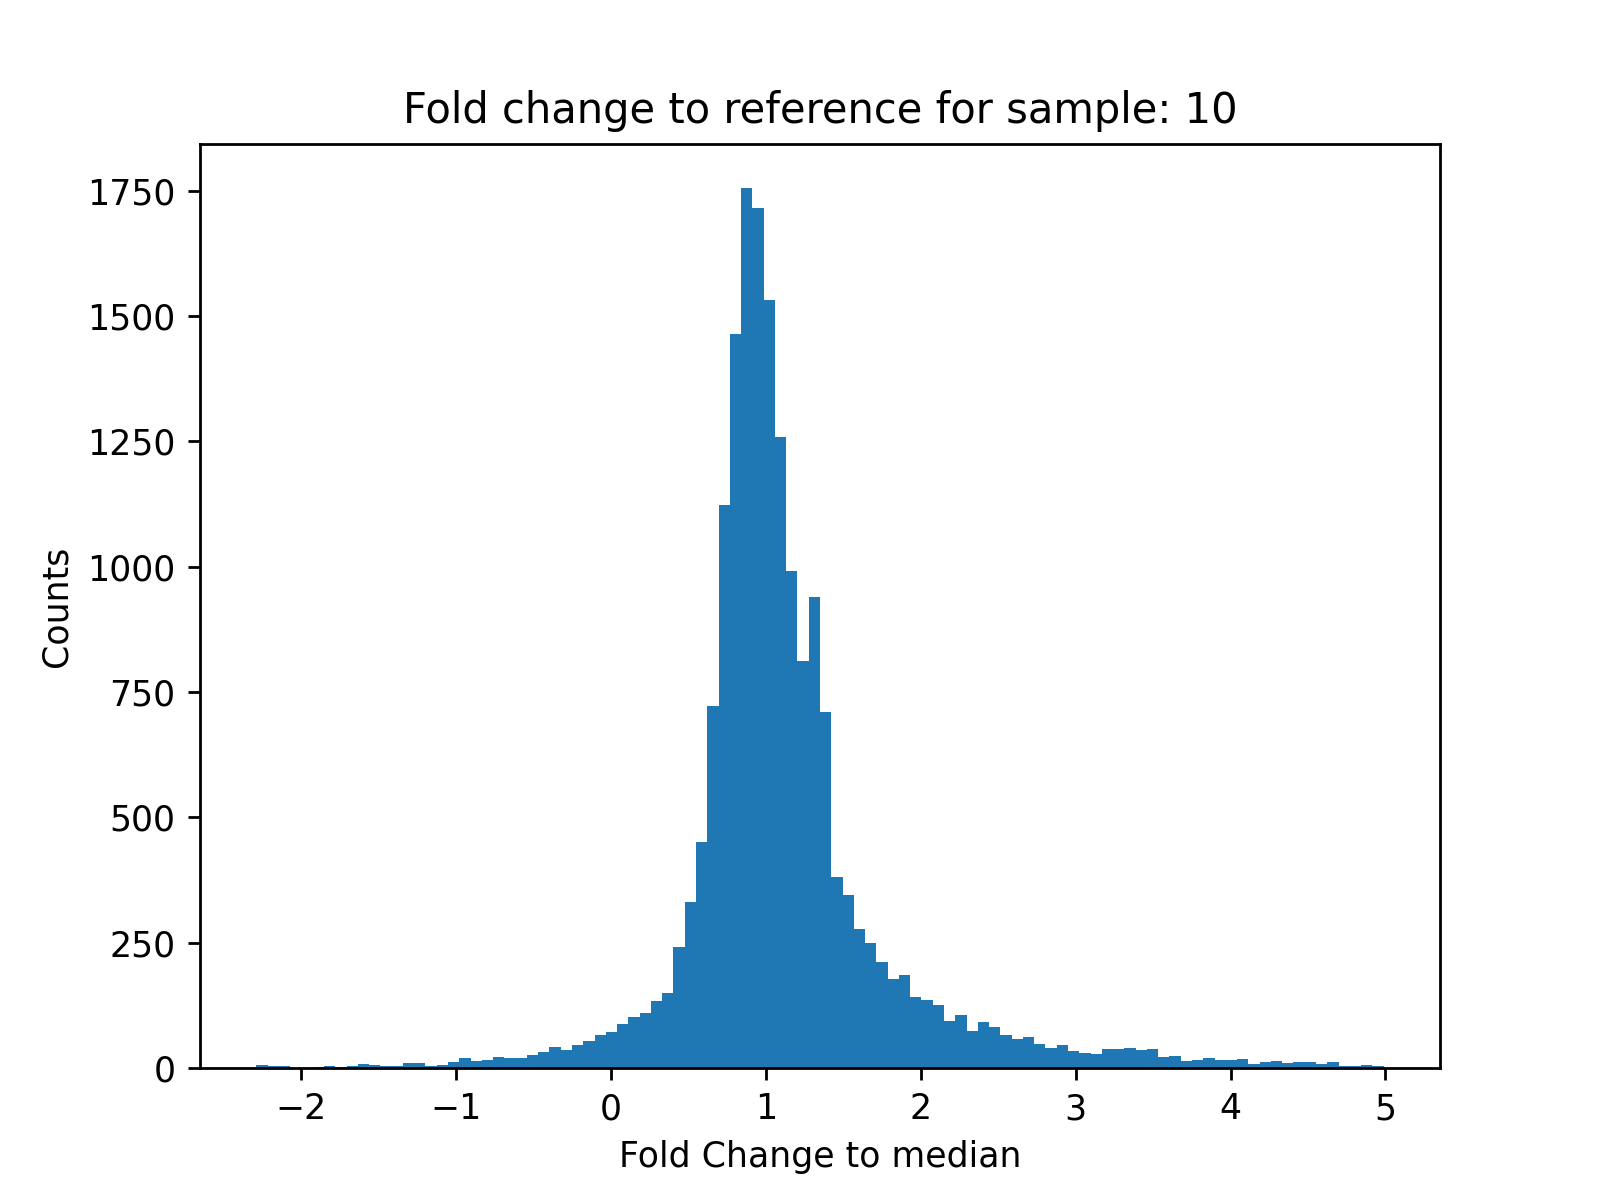

<IPython.core.display.Javascript object>


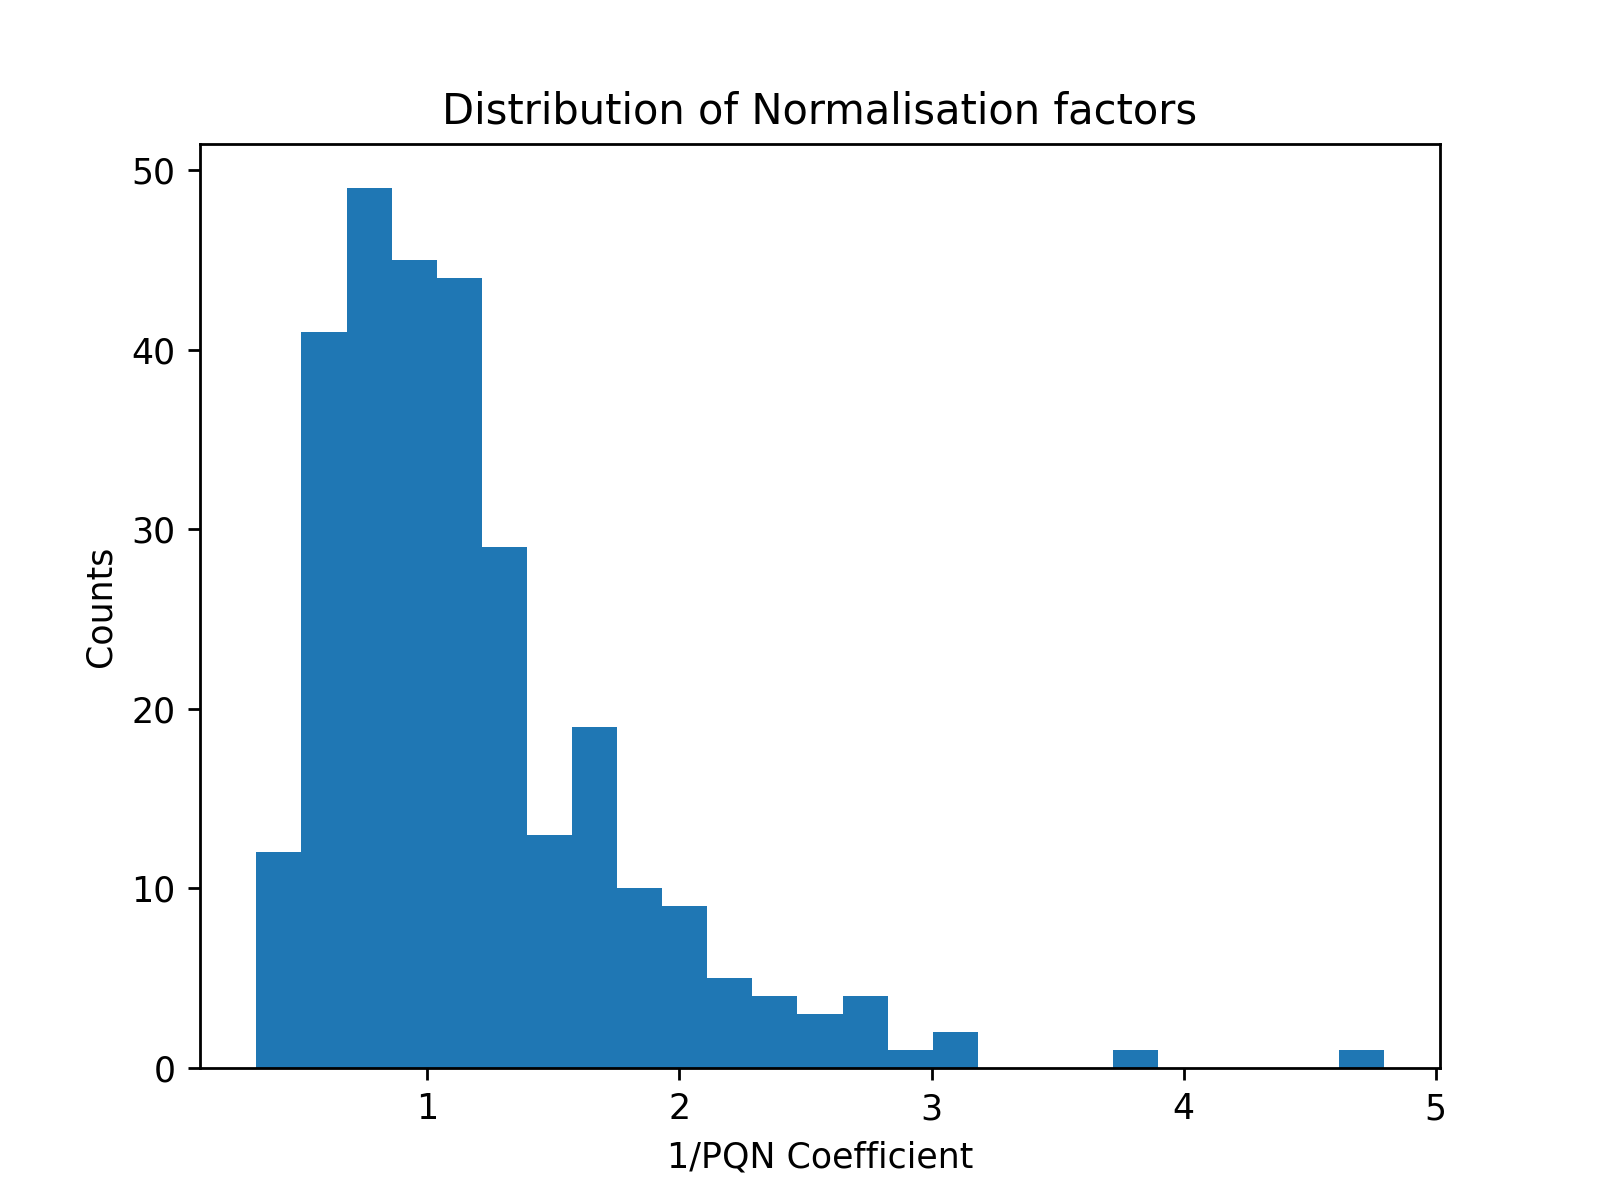

In [10]:
#Truncate extreme values to narrow histogram range
sample_to_plot = 10
idx_to_plot = ((foldChangeMatrix[sample_to_plot, :] <= 5) & (foldChangeMatrix[sample_to_plot, :] >= -5 ))

plt.figure()
plt.title('Fold change to reference for sample: {0}'.format(sample_to_plot))
plt.xlabel("Fold Change to median")
plt.ylabel("Counts")
plt.hist(foldChangeMatrix[sample_to_plot, idx_to_plot], bins=100)
plt.show()

plt.figure()
plt.hist(1/pqn_coef, bins=25)
plt.xlabel("1/PQN Coefficient")
plt.ylabel('Counts')
plt.title("Distribution of Normalisation factors")
plt.show()

We can now compare the original non-normalised data, plotted in blue, with the normalised spectra, in red.

<IPython.core.display.Javascript object>


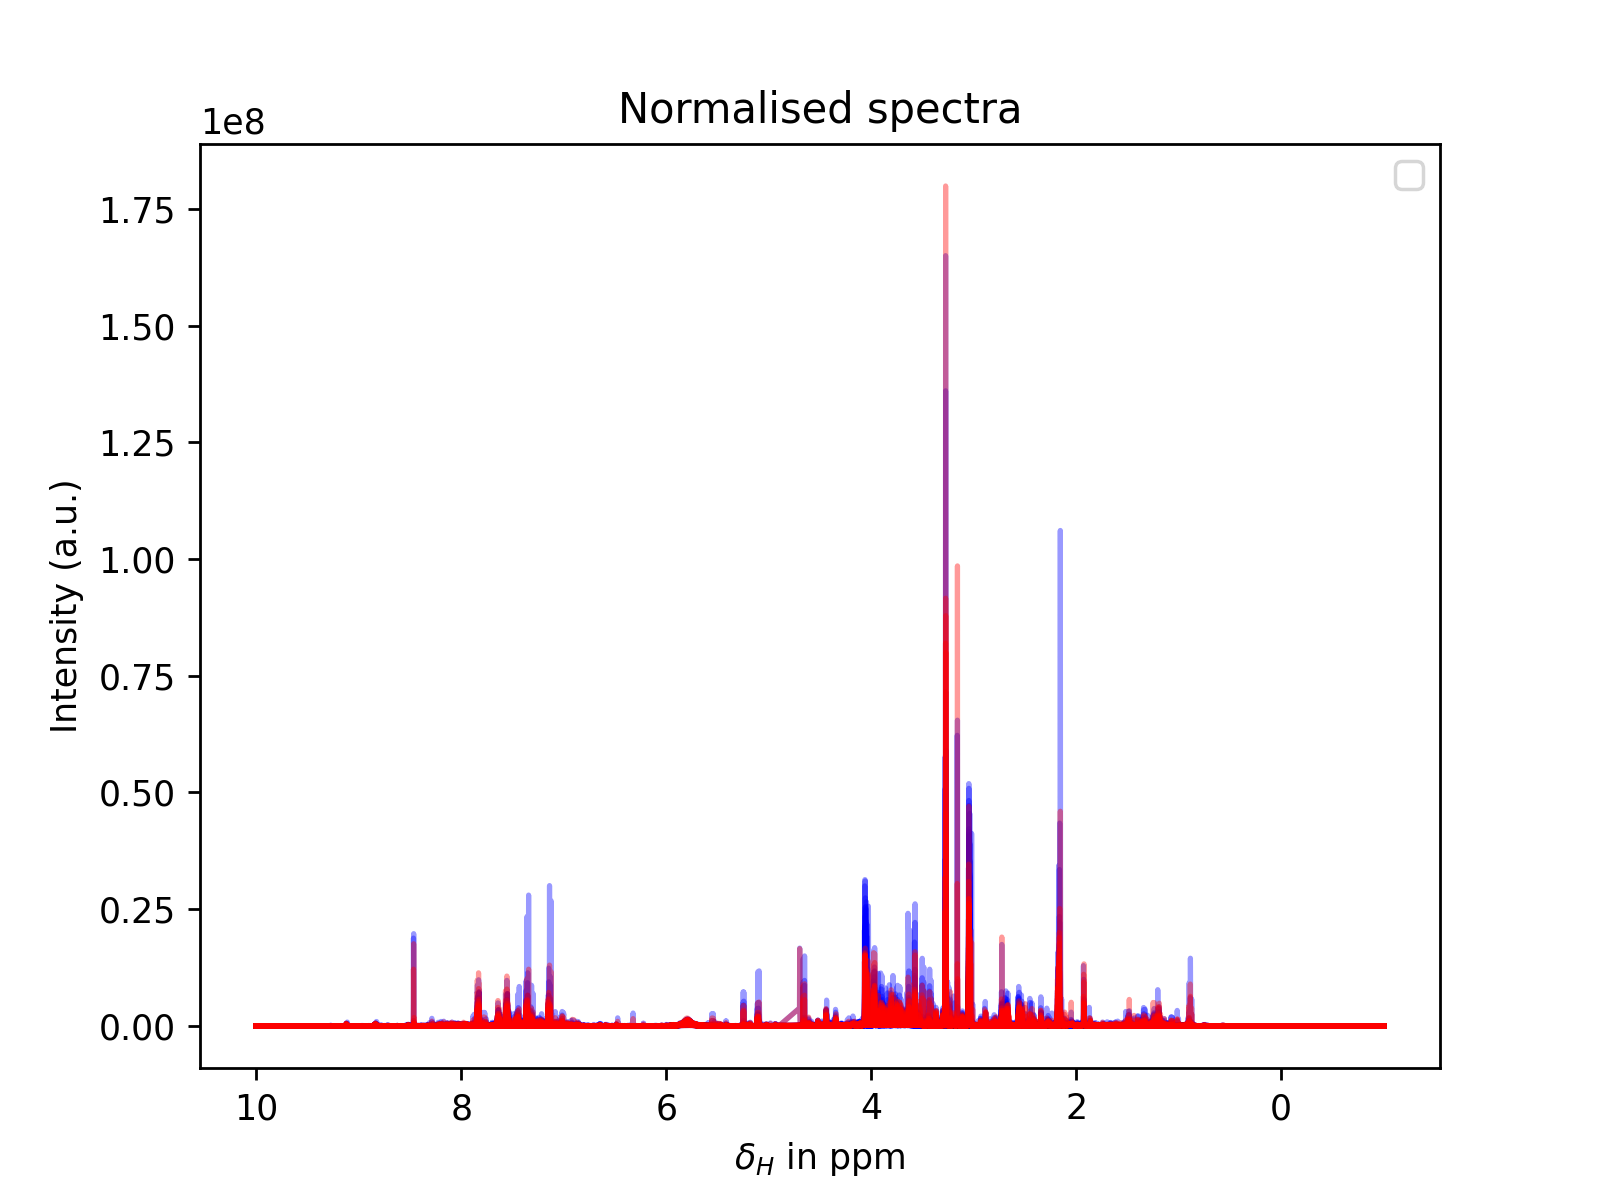

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
fig, ax = plt.subplots()
ax.plot(ppm, X.T,  c='b', alpha=0.4)
ax.plot(ppm, norm_X.T, c='r', alpha=0.4)
ax.set_title("Normalised spectra")
ax.set_xlabel("$\delta_H$ in ppm")
ax.set_ylabel("Intensity (a.u.)")
ax.invert_xaxis()
ax.legend()
plt.show()

In [39]:
#np.savetxt('./Data/Dementia U NMR_X_norm.csv', norm_X, delimiter=',') # to import only the intensity values

#To export the full dataset
sampleMetadata = dementia_nmr_dataset_norm.iloc[:, 0:5]
Intensity_Data = pds.DataFrame(norm_X, columns = ppm)
dementia_nmr_dataset_norm = pds.concat([sampleMetadata, Intensity_Data], axis=1)
dementia_nmr_dataset_norm.to_csv('./Data/Dementia U NMR_Data_normalised.csv', sep=',', index=False)# to import the full dataset

# Scaling

The choice of scaling is an important parameter choice when modelling the data with PCA and PLS regression algorithms. The scaling parameter impacts on the predictive performance of the model, the trends recovered from the data and model interpretation (i.e., loading vectors).

Scaling consists in dividing each variable (column of the data matrix) by a constant value. Variables with a higher intensity tend to have a higher variance. Since PCA and PLS maximize the recovery of variance and covariance, on non-scaled datasets the model will be biased towards features with higher signal intensity. Biologically, it is more reasonable to ensure all variables should be be given equal weight independent of their signal intensity. Scaling the data matrix can remove this bias and enhance recovery of important trends from lower intensity signals.

For more information about data scaling and transformation in metabolomics, we recommend [Berg et al. 2006](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1534033/)

The following 3 types of scaling choices are commonly used with multivariate PCA and PLS analyses:

Mean centring (MC) = $\frac{X - \mu}{\sigma^{0}}$, *scale_power* = 0. Mean centre all variables and apply no scaling.

Pareto scaling = $\frac{X - \mu}{\sigma^{1/2}}$, *scale_power* = 1/2. Mean centre all variables and divide each variable by the square root of its standard deviation ($\sigma$)

Unit variance (UV) scaling = $\frac{X - \mu}{\sigma^{1}}$, *scale_power* = 1. Mean center all variables and scale each variable by its standard deviation.


In the *pyChemometrics.ChemometricsScaler* objects we use the *scale_power* argument to represent the exponent of standard deviation used in scaling.

These three kinds of scaling are demonstrated below, followed by two other data transformation options, the logarithm and the square root transformation.


### 1) Mean-centring only (no scaling)

Removal of the column-wise mean from the data matrix (each variable is recentered around its own mean). Mean centring is usually suggested (although not a hard-requirement, the data).

We will apply the different scaling methods using the *pyChemometrics.ChemometricsScaler* object. We start by initialising a *ChemometricsScaler* object. The *fit* method extracts the scaling parameters (mean and standard deviation vectors) from a data matrix, while the *transform* method takes a data matrix as input and applies to it the scaling using the parameters estimated when the *fit* method was last used.

In [12]:
mc_scaler = ChemometricsScaler(scale_power=0)
mc_scaler.fit(norm_X)
mc_X = mc_scaler.transform(norm_X)


In the next cell we plot the mean centred data matrix. The main features of the spectrum are still relatively easy to pinpoint (which will aid interpretation of multivariate parameters), but the wide range of values still means that higher intensity variables will dominate the analysis. This *penalises* the detection of trends in low intensity signals, which is not, but also ensures that spurious variation in noise peaks.

<IPython.core.display.Javascript object>


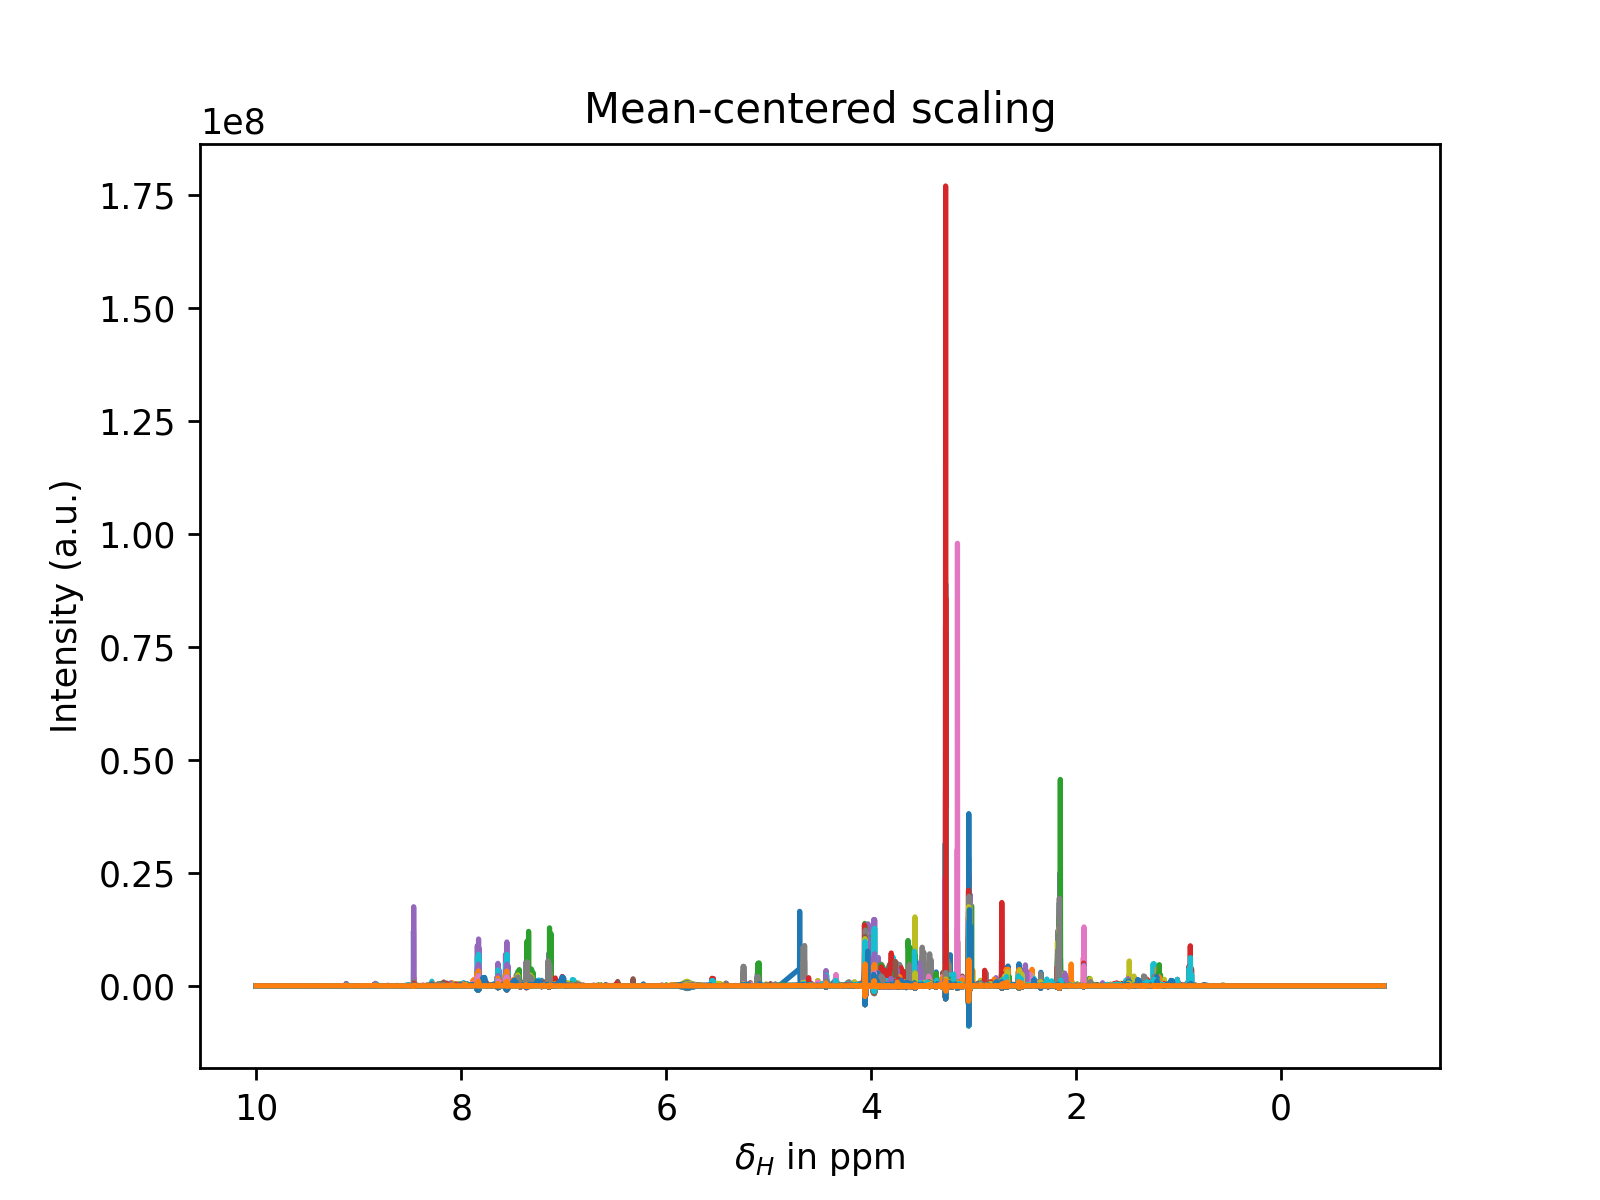

In [13]:
#mc_X = preprocessing.scale(norm_X, axis=0, with_mean=True, with_std=False)
plt.figure()
plt.plot(ppm, mc_X.T)
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.title("Mean-centered scaling")
plt.gca().invert_xaxis()
plt.show()

### 2) Unit-variance (UV) scaling: Mean-centring followed by division of each variable (column) by its own standard deviation

The spectroscopic peaks and signals of the spectrum are now barely recognisable (difficult interpretation), but now the latent variables detected will not be biased towards variation in the high intensity variables, which biologically is a more reasonable criteria. Low intensity noise values are more likely to be picked up, including baseline artefacts, and the magnitude of most variables is now equalised, making it harder to recognise the spectral profile.

In the next example we use the *fit_transform* method, which learns the scaling parameters and returns a scaled data matrix in one go.

In [14]:
uv_scaler = ChemometricsScaler(scale_power=1)
uv_X = uv_scaler.fit_transform(norm_X)


<IPython.core.display.Javascript object>


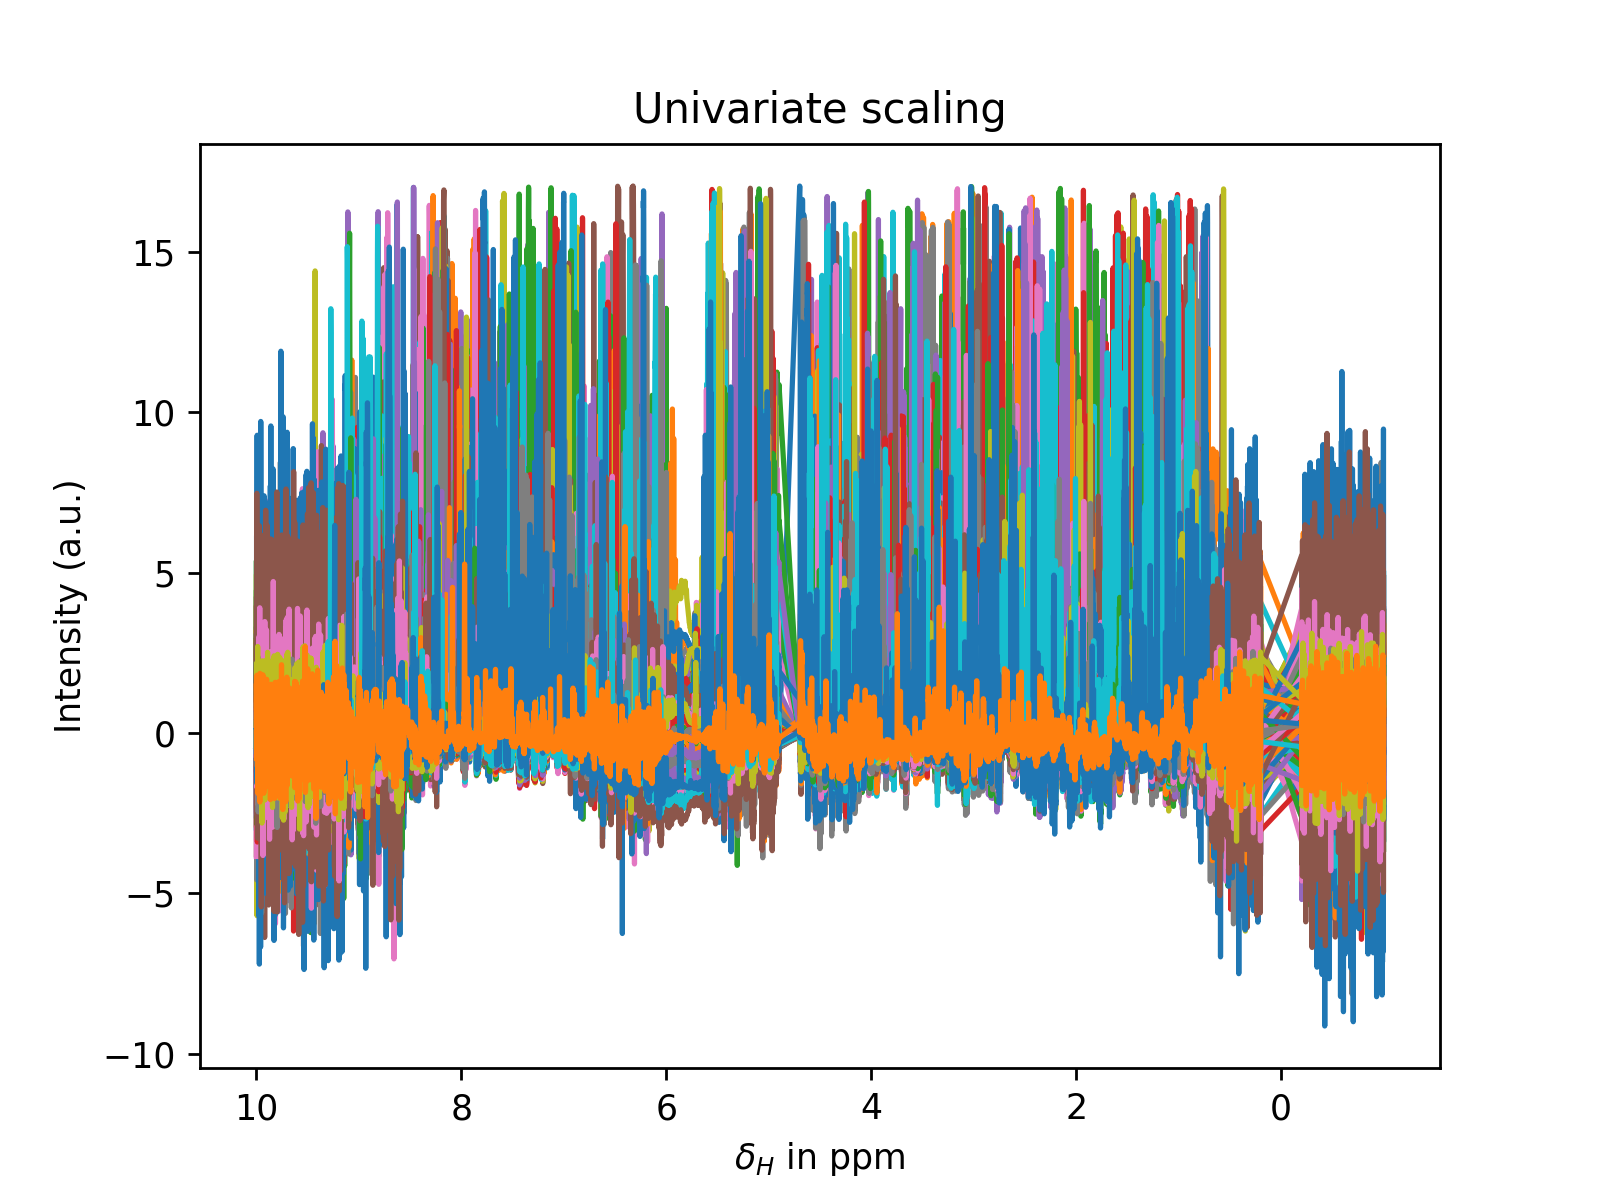

In [15]:
# Univariate and mean-centred
plt.figure()
plt.plot(ppm, uv_X.T)
plt.title("Univariate scaling")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
plt.show()

### 3) Pareto scaling: Mean-centring followed by division of each variable (column) by the square root of its own standard deviation

Pareto scaling provides a balance between the mean centering (no scaling) and UV scaling.

In [16]:
par_scaler = ChemometricsScaler(scale_power=1/2)
pa_X = par_scaler.fit_transform(norm_X)

<IPython.core.display.Javascript object>


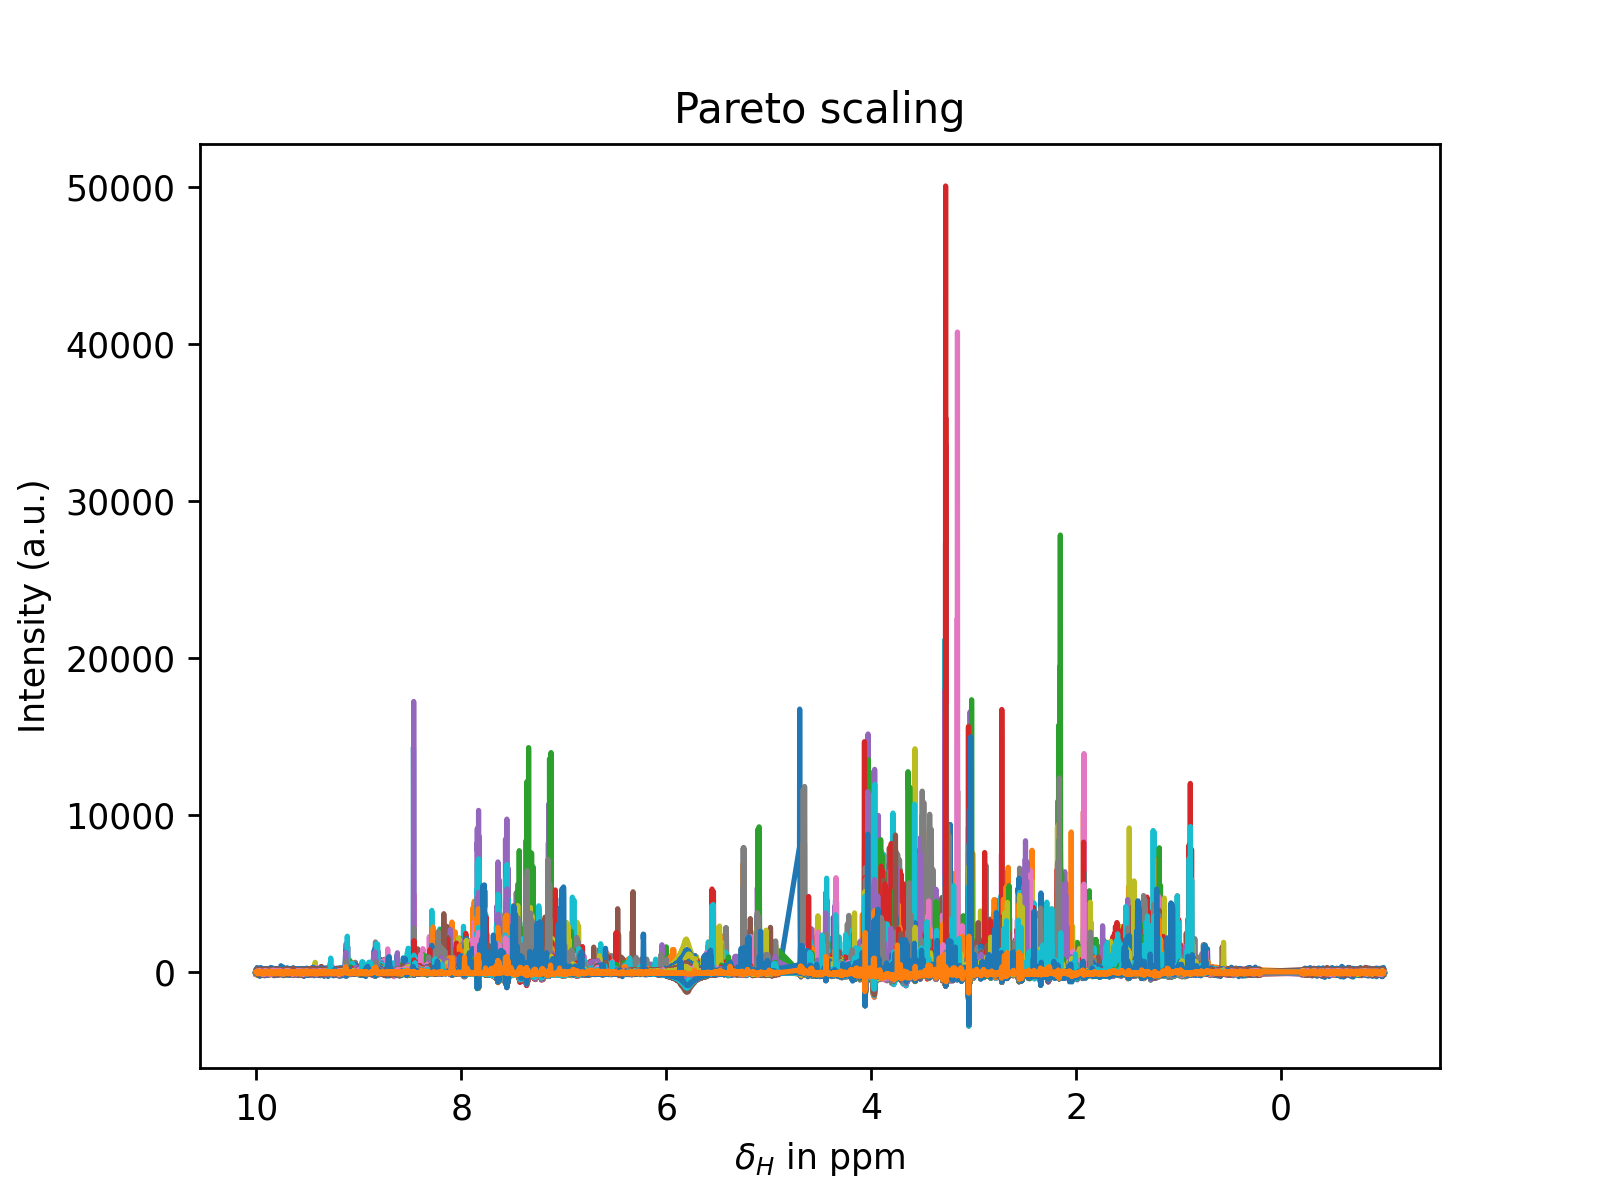

In [17]:
plt.figure()
plt.plot(ppm, pa_X.T)
plt.title("Pareto scaling")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
plt.show()

### 4) Logarithmic and square root transformation

Another option is apply non-linear transformations to the data matrix, such as the logarithmic transform and the square-root transformation.

Log-transformation is a non-linear transformation, which has the advantage of removing the effect of heteroskedasticity between and within variables, when the coefficient of variation of the methods is constant (variance increasing with the mean). The scaling effect it has on variables is somewhat similar to Pareto scaling. They are also recommended for univariate analysis.
These transformations functions are not defined for 0 values. To perform logarithmic transform  we first add an offset to ensure all data points are non-negative and non-zero. Here it is calculated by adding the minimum value in the dataset plus 1. Any offset or other transformation should be carefully recorded.

Logarithmic and square-root transformations are not implemented in the *pyChemometrics.ChemometricsScaler* object, but can be applied by transforming the data as shown below. After applying these transformations, the data should still be mean centred before PCA and PLS modeling.

<IPython.core.display.Javascript object>


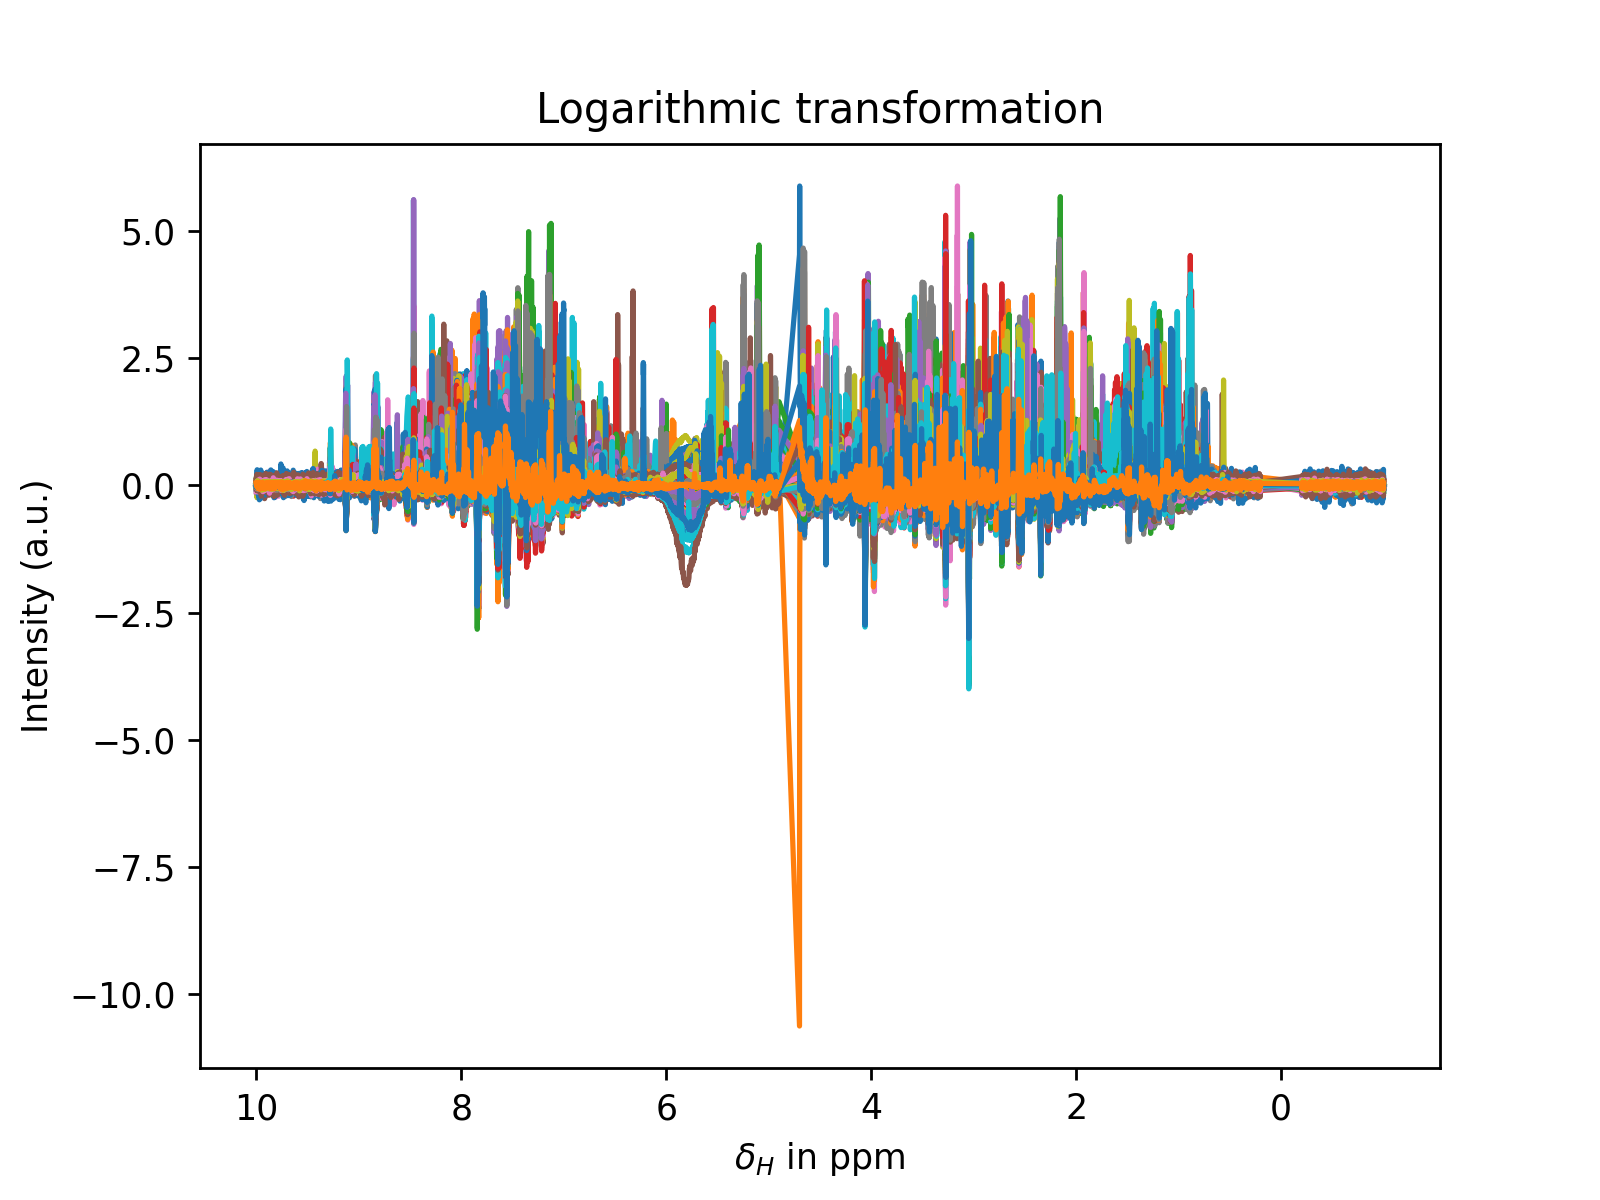

<IPython.core.display.Javascript object>


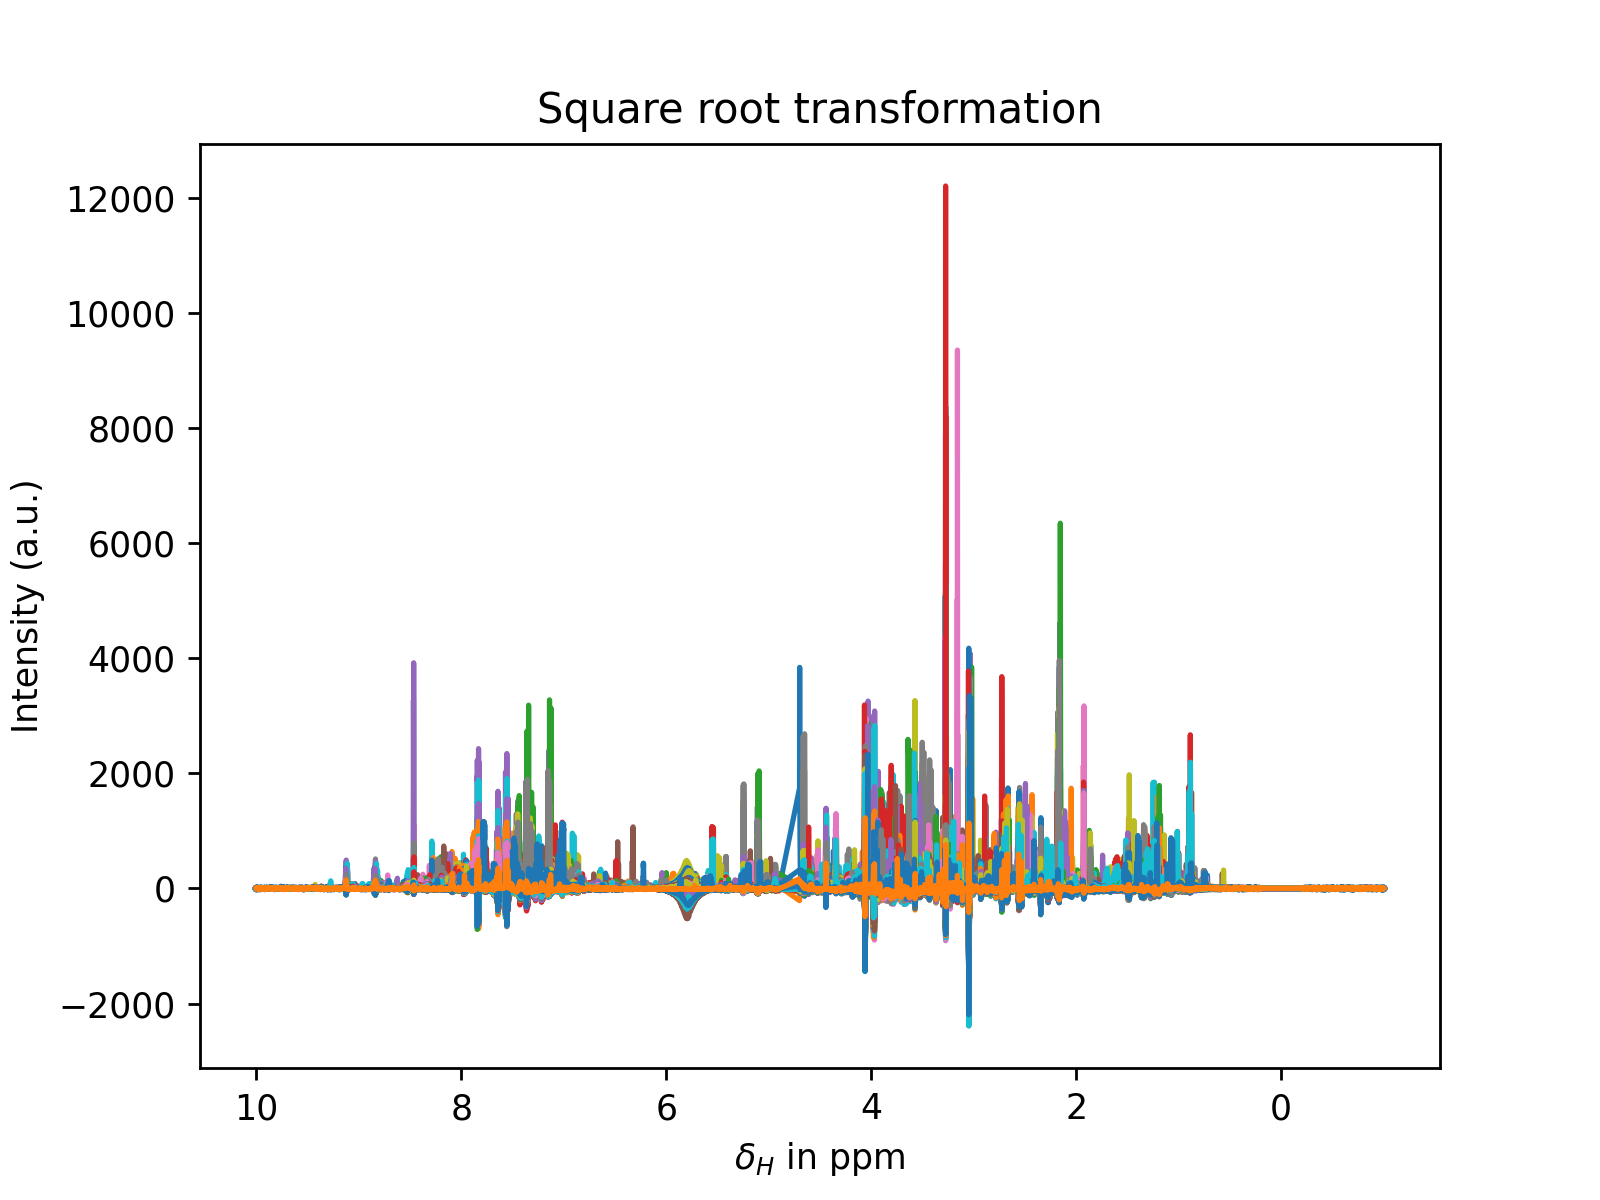

In [24]:
# Log scaling

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.abs(np.min(norm_X)) + 1
log_X = np.log(norm_X + offset)
mean_logvec = np.mean(log_X, axis=0)
mclogX = (log_X - mean_logvec)

plt.figure()
plt.plot(ppm, mclogX.T)
plt.title("Logarithmic transformation")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
plt.show()

# Square root transformation

# Offset is required to ensure all datapoints are non-negative and non-zero.
# Here it is being calculated by simply adding 1
#to the minimum value in the dataset (to account for negative values in the noise region as well as 0).

offset = np.abs(np.min(norm_X)) + 1
sqrt_X = np.sqrt(norm_X + offset)
mean_sqrvec = np.mean(sqrt_X, axis=0)
mcsqrt_X = (sqrt_X - mean_sqrvec)

plt.figure()
plt.plot(ppm, mcsqrt_X.T)
plt.title("Square root transformation")
plt.xlabel("$\delta_H$ in ppm")
plt.ylabel("Intensity (a.u.)")
plt.gca().invert_xaxis()
plt.show()

